In [1]:
import pandas as pd

In [2]:
pwd

'/home/admin/Desktop/AI_Hackathon/github/cyberguard-ai-hackathon-indiaai/notebooks'

# Read CSV files using Pandas

In [3]:

# Load your datasets
df_train = pd.read_csv('../processed_data/processed_train.csv')
df_test = pd.read_csv('../processed_data/processed_test.csv')


# Combine both datasets
df = pd.concat([df_train, df_test], ignore_index=True)
df.to_csv('../processed_data/full_data.csv', index=False)



## Number of rows in the given datastore

In [4]:
len(df)

124887

## display first rows

In [5]:
df.head(10)

,category,sub_category,crimeaditionalinfo
0,online and social media related crime,cyber bullying/stalking/sexting,i had continue received random calls and abusi...
1,online financial fraud,fraud call/vishing,the above fraudster is continuously messaging ...
2,online gambling betting,online gambling betting,he is acting like a police and demanding for m...
3,online and social media related crime,online job fraud,in apna job i have applied for job interview f...
4,online financial fraud,fraud call/vishing,i received a call from lady stating that she w...
5,online financial fraud,upi related frauds,fraud \t upi paytm \r\nbank \tpunjab national ...
6,online financial fraud,fraud call/vishing,sir i am prabhat singh jat an app on playstor...
7,online financial fraud,internet banking related fraud,financial fraud rs
8,women/child related crime,rape/gang rape-sexually abusive content,i got the message on whatsapp to my number the...
9,any other cyber crime,other,details entered in pdf file person posing as a...


## display columns names

In [6]:
df.columns


Index(['category', 'sub_category', 'crimeaditionalinfo'], dtype='object')

## display dataset information

In [7]:
df.describe()


,category,sub_category,crimeaditionalinfo
count,124887,124887,124887
unique,14,42,112369
top,online financial fraud,upi related frauds,respected sir\r\n\r\na very serious matter i w...
freq,76306,35729,3095


## Number of NaN values for particular columns

In [8]:
df.isnull().sum()

category              0
sub_category          0
crimeaditionalinfo    0
dtype: int64

In [9]:
df['category'].unique()

array(['online and social media related crime', 'online financial fraud',
       'online gambling  betting', 'women/child related crime',
       'any other cyber crime', 'cyber attack/ dependent crimes',
       'cryptocurrency crime',
       'hacking  damage to computercomputer system etc',
       'cyber terrorism', 'online cyber trafficking', 'ransomware',
       'report unlawful content',
       'hacking  damage to computer system etc',
       'crime against women & children'], dtype=object)

#### As of now we can keep these all categories and no need to process this

In [10]:
df['sub_category'].unique()

array(['cyber bullying/stalking/sexting', 'fraud call/vishing',
       'online gambling  betting', 'online job fraud',
       'upi related frauds', 'internet banking related fraud',
       'rape/gang rape-sexually abusive content', 'other',
       'profile hacking identity theft',
       'debit/credit card fraud or sim swap fraud',
       'ewallet related fraud', 'data breach/theft',
       'cheating by impersonation',
       'denial of service (dos)/distributed denial of service (ddos) attacks',
       'fakeimpersonating profile', 'cryptocurrency fraud',
       'sexually explicit act', 'sexually obscene material',
       'malware attack', 'business email compromise/email takeover',
       'email hacking', 'hacking/defacement',
       'unauthorised access/data breach', 'sql injection',
       'provocative speech for unlawful acts', 'ransomware attack',
       'cyber terrorism',
       'child pornography/child sexual abuse material (csam)',
       'tampering with computer source documen

In [11]:
df.to_csv('../processed_data/full_data.csv', index=False)

In [12]:
# Check class distribution in training set
print(df['category'].value_counts())


category
online financial fraud                            76306
online and social media related crime             16277
any other cyber crime                             14547
women/child related crime                          8826
cyber attack/ dependent crimes                     4869
hacking  damage to computercomputer system etc     1710
cryptocurrency crime                                646
hacking  damage to computer system etc              592
online gambling  betting                            578
online cyber trafficking                            244
cyber terrorism                                     213
ransomware                                           74
crime against women & children                        4
report unlawful content                               1
Name: count, dtype: int64


In [13]:
category_counts = df['category'].value_counts()


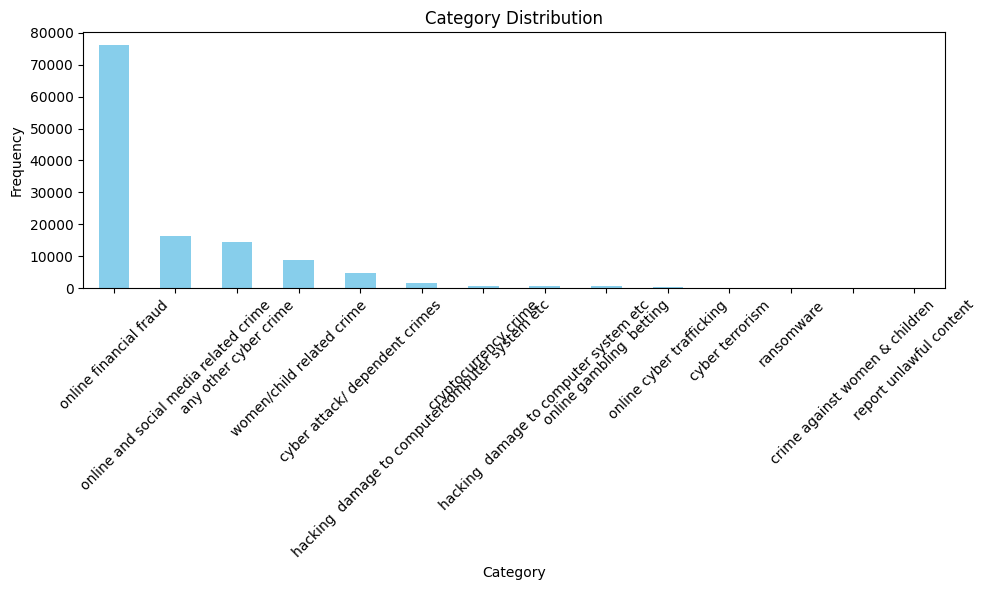

In [14]:
import matplotlib.pyplot as plt

# Plotting the bar chart
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar', color='skyblue')
plt.title('Category Distribution')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Rotate category labels if necessary
plt.tight_layout()  # Adjust layout to fit everything nicely
plt.savefig('test_category_distribution.png', format='png', dpi=300)  # Save with high resolution
plt.show()

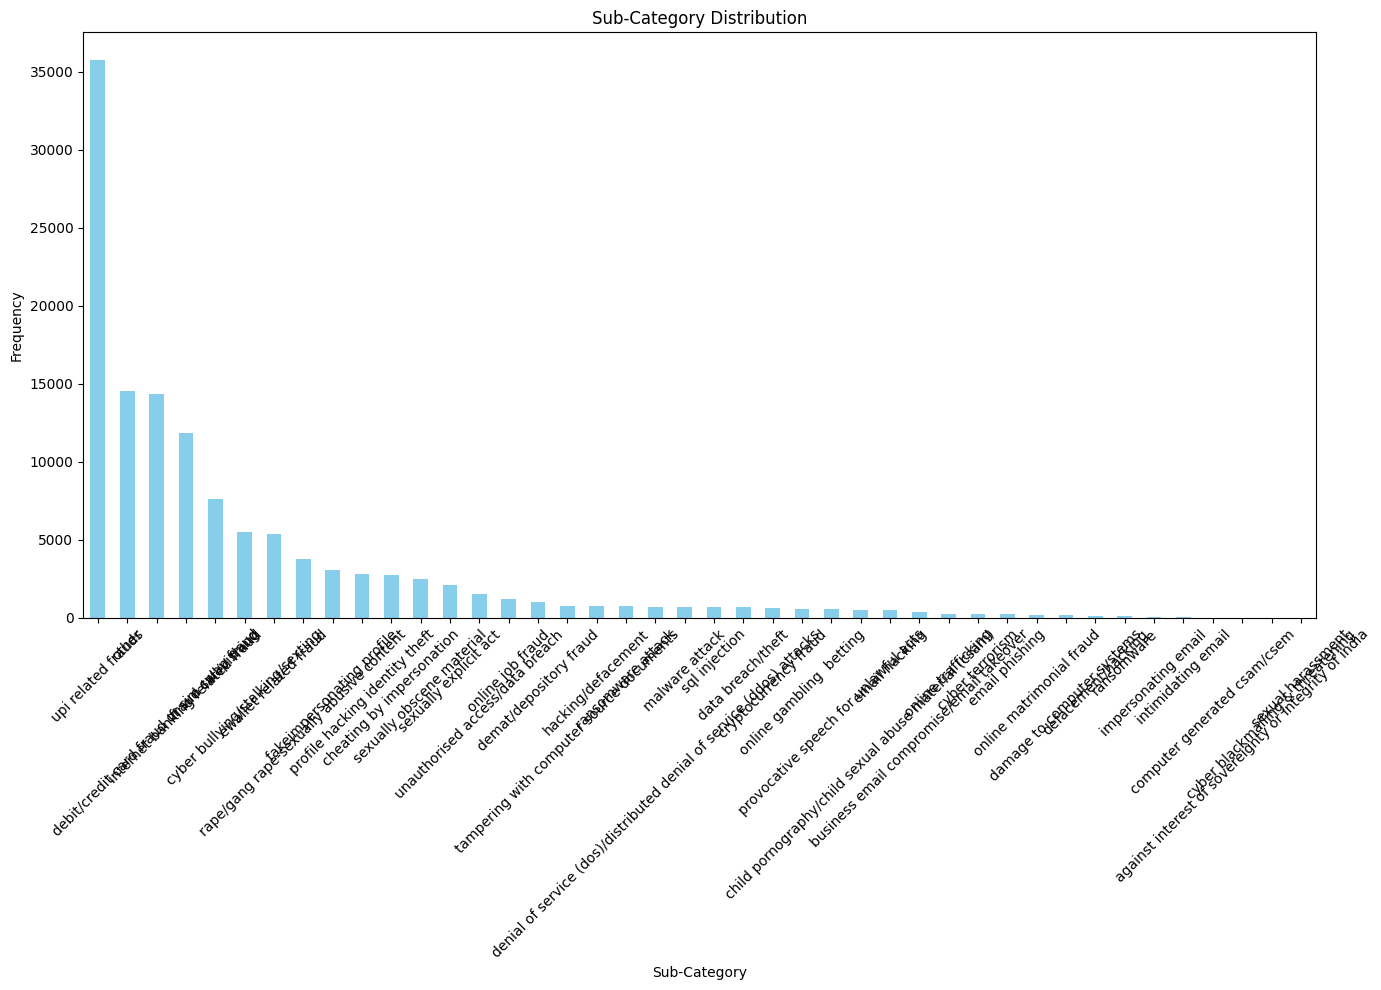

In [15]:
sub_category_counts = df['sub_category'].value_counts()
# Plotting the bar chart
plt.figure(figsize=(14, 10))
sub_category_counts.plot(kind='bar', color='skyblue')
plt.title('Sub-Category Distribution')
plt.xlabel('Sub-Category')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Rotate category labels if necessary
plt.tight_layout()  # Adjust layout to fit everything nicely
plt.savefig('test_sub_category_distribution.png', format='png', dpi=300)  # Save with high resolution
plt.show()

In [18]:
category_to_subcategory = (
    df.groupby('category')['sub_category']
    .apply(lambda x: list(set(x)))  # Use `set` to remove duplicates
    .to_dict()
)

category_to_subcategory

{'any other cyber crime': ['other'],
 'crime against women & children': ['cyber blackmailing & threatening',
  'sexual harassment',
  'computer generated csam/csem'],
 'cryptocurrency crime': ['cryptocurrency fraud'],
 'cyber attack/ dependent crimes': ['tampering with computer source documents',
  'hacking/defacement',
  'malware attack',
  'ransomware attack',
  'data breach/theft',
  'sql injection',
  'denial of service (dos)/distributed denial of service (ddos) attacks'],
 'cyber terrorism': ['cyber terrorism'],
 'hacking  damage to computer system etc': ['tampering with computer source documents',
  'unauthorised access/data breach',
  'damage to computer systems',
  'defacement/hacking',
  'email hacking'],
 'hacking  damage to computercomputer system etc': ['tampering with computer source documents',
  'unauthorised access/data breach',
  'damage to computer systems',
  'defacement/hacking',
  'email hacking'],
 'online and social media related crime': ['email phishing',
  'imp

In [19]:
import json
# Save the dictionary as a JSON file
output_file = "category_to_subcategory.json"
with open(output_file, "w") as f:
    json.dump(category_to_subcategory, f, indent=4)

In [21]:
import json

# Load the JSON file
with open("category_to_subcategory.json", "r") as f:
    category_to_subcategory = json.load(f)

# Create a reverse mapping: sub_category -> category
subcategory_to_category = {}
for category, subcategories in category_to_subcategory.items():
    for subcategory in subcategories:
        subcategory_to_category[subcategory] = category

# Function to get the category for a given sub_category
def get_category(sub_category):
    return subcategory_to_category.get(sub_category, "Category not found")

# Example usage
print(get_category("child pornography/child sexual abuse material (csam)"))  # Output: Fraud
print(get_category("fraud call/vishing"))   # Output: Theft
print(get_category("Unknown"))   # Output: Category not found

women/child related crime
online financial fraud
Category not found
